In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

#### Importing the .csv file, and creating a dataframe object of that data

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


### Plotting the graph of Area vs Price of houses

---
##### " %matplotlib inline " : Magic Command
---

- plt is a Module, not an Object

- when we import a library (import math, import pandas, etc.), the name we give it (like plt) represents the entire toolkit.

- we don't need to "instantiate" it like a class (e.g., my_obj = ClassName()) because the functions are already ready to use.

- Matplotlib’s pyplot interface is designed to behave like MATLAB. It is a state-based interface. 
- This means plt keeps track of things globally in the background for us.


---
##### It sets the backend of matplotlib to the 'inline' backend.
---
Static Images: It ensures that the output of plotting commands is displayed directly below the code cell that produced it.

Embedded: The resulting plots are stored within the notebook document itself (as PNG images usually), meaning if you save the notebook and reopen it later, the plots will still be there without running the code again.


---
##### " plt.scatter(...) ": When we call this, plt checks: "Is there a figure open?"
---
- If No: It silently creates a new Figure object and a new Axes (plot area) object in the background.

- It then draws the scatter plot on that "current" axes.

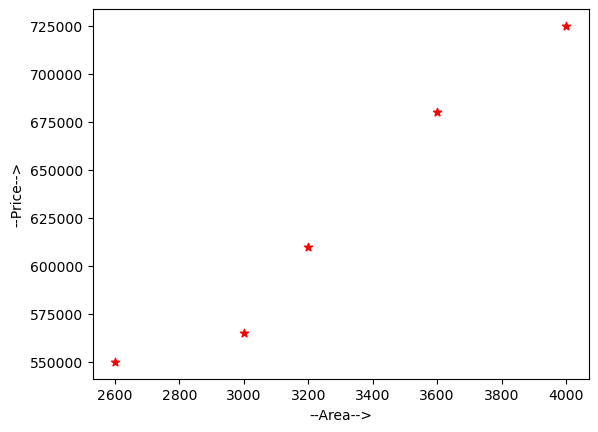

In [3]:
%matplotlib inline
plt.xlabel("--Area-->")
plt.ylabel("--Price-->")
plt.scatter(df.area, df.price, color = 'red', marker='*')
plt.show()


### Making Area:Dataframe and Prices:Series to pass it on LR model

In [4]:
Area = df.drop('price', axis='columns')
prices = df.price
print(f"Area DF :\n{Area}\n\nPrices Series:\n{prices}\n")

Area DF :
   area
0  2600
1  3000
2  3200
3  3600
4  4000

Prices Series:
0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64



### Creating A Object for LR model

In [5]:
reg = linear_model.LinearRegression()

### Fitting datas int the model

In [6]:
reg.fit( Area, prices )

LinearRegression()

### Predict price of a home with area = 3300 sqr ft

In [7]:
predicted_y = reg.predict([[3300]])[0]
predicted_y

d:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(628715.7534246575)

### Verifying the Calculation

---
Main Equation or Formula:  
### y = mx + b

- y : predicted value
- m : coefficient / slope
- b : intercept
---
to get 'm' use : reg.coef_  
to get 'b' use : reg.intercept_  


In [8]:
m = reg.coef_[0]
b = reg.intercept_

print(f"""
m = {m}
b = {b}
x = {3300}
""")


m = 135.78767123287673
b = 180616.43835616432
x = 3300



Calculating y manually for x = 3300 :

In [9]:
calulated_y = (m*3300) + b
print(f"Calculated y : { calulated_y } ") # y = mx + b

Calculated y : 628715.7534246575 


Verifying : 

In [10]:
print(f"""
Predicted y  : {predicted_y}
Calculated y : {calulated_y}
""")


Predicted y  : 628715.7534246575
Calculated y : 628715.7534246575



Hence, verified how the prediction is maded based on 'm' and 'b'

---
### Plotting the Line of Regression :
---

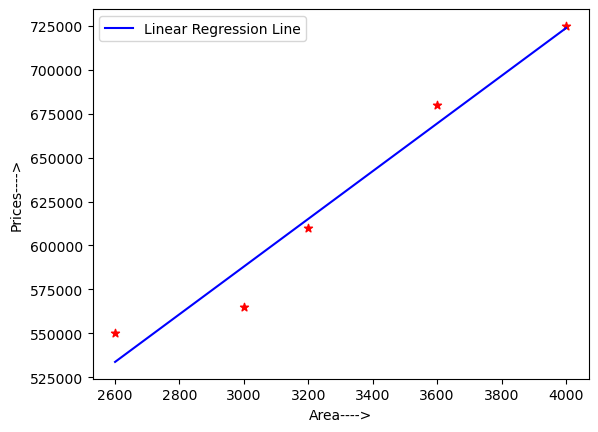

In [11]:
plt.xlabel("Area---->")
plt.ylabel("Prices---->")
plt.scatter(df.area, df.price, color = "red", marker = '*')

# calculate prediction price using regression formula
# Creates a smooth list of predicted prices to draw a straight regression line.
# Basically Creates a DF of the predicted values of y:prices_of_houses
Price_line = m * Area + b 

# Exact Value of Area:DF and Predicted_Price Values used to draw the smooth line
plt.plot(Area, Price_line, color = 'blue', label='Linear Regression Line')
plt.legend()
plt.show()